# DS processing with CLI

In this tutorial, we demostrate how to do standard DS processing with the decorrelation CLI interface.

## Load GAMMA result

The data from gamma software needed for this tutorial:

In [ ]:
!ls -R ../../data/gamma/

../../data/gamma/:
DEM  geocoding	rslc

../../data/gamma/DEM:
dem_seg  dem_seg_par

../../data/gamma/geocoding:
20210802.diff_par  20210802.lt_fine  20210802.lv_theta
20210802.hgt	   20210802.lv_phi

../../data/gamma/rslc:
20210802.rslc	   20211011.rslc.par  20220718.rslc	 20220912.rslc.par
20210802.rslc.par  20211025.rslc      20220718.rslc.par  20220926.rslc
20210816.rslc	   20211025.rslc.par  20220801.rslc	 20220926.rslc.par
20210816.rslc.par  20220606.rslc      20220801.rslc.par  20221010.rslc
20210830.rslc	   20220606.rslc.par  20220815.rslc	 20221010.rslc.par
20210830.rslc.par  20220620.rslc      20220815.rslc.par  20221024.rslc
20210913.rslc	   20220620.rslc.par  20220829.rslc	 20221024.rslc.par
20210913.rslc.par  20220704.rslc      20220829.rslc.par
20211011.rslc	   20220704.rslc.par  20220912.rslc


And we load them with functions in the `load` module:

In [ ]:
from decorrelation.cli.load import (de_load_gamma_flatten_rslc,
                                    de_load_gamma_lat_lon_hgt,
                                    de_load_gamma_look_vector,
                                    de_load_gamma_range,
                                    de_load_gamma_metadata)

The detailed usage of these functions is explained [here](../CLI/load.ipynb)

In [ ]:
rslc_dir = '../../data/gamma/rslc'
reference = '20220620'
rslc_par = '../../data/gamma/rslc/20220620.rslc.par'
hgt = '../../data/gamma/geocoding/20210802.hgt'
lt = '../../data/gamma/geocoding/20210802.lt_fine'
diff_par = '../../data/gamma/geocoding/20210802.diff_par'
dem_par = '../../data/gamma/DEM/dem_seg_par'
theta = '../../data/gamma/geocoding/20210802.lv_theta'
phi = '../../data/gamma/geocoding/20210802.lv_phi'
az_chunk_size = 1000

rslc_zarr = './DS_Processing_with_CLI/rslc.zarr'
lat_zarr = './DS_Processing_with_CLI/lat.zarr'
lon_zarr = './DS_Processing_with_CLI/lon.zarr'
theta_zarr = './DS_Processing_with_CLI/theta.zarr'
phi_zarr = './DS_Processing_with_CLI/phi.zarr'
hgt_zarr = './DS_Processing_with_CLI/hgt.zarr'
range_zarr = './DS_Processing_with_CLI/range.zarr'
meta_file = './DS_Processing_with_CLI/meta.toml'

In [ ]:
de_load_gamma_flatten_rslc(rslc_dir,reference,hgt,rslc_zarr,az_chunk_size)
de_load_gamma_lat_lon_hgt(diff_par,rslc_par,dem_par,hgt,lat_zarr,lon_zarr,hgt_zarr,az_chunk_size)
de_load_gamma_look_vector(theta,phi,lt,rslc_par,dem_par,theta_zarr,phi_zarr,az_chunk_size)
de_load_gamma_range(rslc_par,range_zarr,az_chunk_size)
de_load_gamma_metadata(rslc_dir,reference,meta_file)

2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - fetching args:
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - rslc_dir = '../../data/gamma/rslc'
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - reference = '20220620'
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - hgt = '../../data/gamma/geocoding/20210802.hgt'
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - rslc_zarr = './DS_Processing_with_CLI/rslc.zarr'
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - az_chunk_size = 1000
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - log = None
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - fetching args done.
2023-10-13 21:40:18 - de_load_gamma_flatten_rslc - INFO - rslc found: 
        date                                 rslc  \
0   20210802  ../../data/gamma/rslc/20210802.rslc   
1   20210816  ../../data/gamma/rslc/20210816.rslc   
2   20210830  ../../data/gamma/rslc/20210830.rslc   
3   20210913  ../../data/gamma/

Then we get all needed data: look vector, latitude, lontitude, height, metadata, slant range distance, and flattened rslc stack.

## DS candidates selection

First, we select spatial homogenious pixels:

In [ ]:
from decorrelation.cli.shp import de_shp_test

In [ ]:
rslc = './DS_Processing_with_CLI/rslc.zarr'
pvalue = './DS_Processing_with_CLI/pvalue.zarr'
az_half_win = 5
r_half_win = 5
method = 'ks'
az_chunk_size = 1000

In [ ]:
de_shp_test(rslc,pvalue,
            az_half_win=az_half_win,r_half_win=r_half_win,
            method=method,az_chunk_size=az_chunk_size)

2023-10-13 21:42:46 - de_shp_test - INFO - fetching args:
2023-10-13 21:42:46 - de_shp_test - INFO - rslc = './DS_Processing_with_CLI/rslc.zarr'
2023-10-13 21:42:46 - de_shp_test - INFO - pvalue = './DS_Processing_with_CLI/pvalue.zarr'
2023-10-13 21:42:46 - de_shp_test - INFO - az_half_win = 5
2023-10-13 21:42:46 - de_shp_test - INFO - r_half_win = 5
2023-10-13 21:42:46 - de_shp_test - INFO - method = 'ks'
2023-10-13 21:42:46 - de_shp_test - INFO - az_chunk_size = 1000
2023-10-13 21:42:46 - de_shp_test - INFO - log = None
2023-10-13 21:42:46 - de_shp_test - INFO - fetching args done.
2023-10-13 21:42:46 - de_shp_test - INFO - hypothetic test method: ks
2023-10-13 21:42:46 - de_shp_test - INFO - ./DS_Processing_with_CLI/rslc.zarr zarray shape: (2500, 1834, 17)
2023-10-13 21:42:46 - de_shp_test - INFO - ./DS_Processing_with_CLI/rslc.zarr zarray chunks: (1000, 1834, 1)
2023-10-13 21:42:46 - de_shp_test - INFO - ./DS_Processing_with_CLI/rslc.zarr zarray dtype: complex64
2023-10-13 21:42:46

2023-10-13 21:42:48,068 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:48,068 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:48,068 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:48,068 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:48,086 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:48,087 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:48,087 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:48,087 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:48,087 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:48,087 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-

2023-10-13 21:42:51 - de_shp_test - INFO - dask local CUDA cluster started.
2023-10-13 21:42:51 - de_shp_test - INFO - rslc dask array shape: (2500, 1834, 17)
2023-10-13 21:42:51 - de_shp_test - INFO - rslc dask array chunksize: (1000, 1834, 17)
2023-10-13 21:42:51 - de_shp_test - INFO - rslc dask array dtype: complex64
2023-10-13 21:42:51 - de_shp_test - INFO - azimuth half window size: 5; azimuth window size: 11
2023-10-13 21:42:51 - de_shp_test - INFO - range half window size: 5; range window size: 11
2023-10-13 21:42:51 - de_shp_test - INFO - setting shared boundaries between rlsc chunks.
2023-10-13 21:42:51 - de_shp_test - INFO - rslc with overlap dask array shape: (2520, 1834, 17)
2023-10-13 21:42:51 - de_shp_test - INFO - rslc with overlap dask array chunksize: (1010, 1834, 17)
2023-10-13 21:42:51 - de_shp_test - INFO - rslc with overlap dask array dtype: complex64
2023-10-13 21:42:51 - de_shp_test - INFO - rmli with overlap dask array shape: (2520, 1834, 17)
2023-10-13 21:42:51

Here we use two sample Kolmogorov-Smirnov (KS) test for SHP identification.
The output `pvalue` is the P-value for this test.
The smaller the p-value, the more likely the two sample are from same distribution, i.e.,
the more likely the two pixels are SHP to each other.

Then we select SHP by setting a threshold on this Pvalue, and select DS by seeting a threshold on the number of SHP pixels have. They are done with one single function:

In [ ]:
from decorrelation.cli.shp import de_select_ds_can

In [ ]:
ds_can_is_shp = './DS_Processing_with_CLI/ds_can_is_shp.zarr'
ds_can_idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
shp_num_fig = './DS_Processing_with_CLI/shp_num_fig.png'
is_ds_can_fig = './DS_Processing_with_CLI/is_ds_can.png'
az_chunk_size = 1000
p_max = 0.05
shp_num_min=50
ds_can_chunk_size = 100000

2023-10-13 21:41:21 - de_select_ds_can - INFO - fetching args:
2023-10-13 21:41:21 - de_select_ds_can - INFO - pvalue = './DS_Processing_with_CLI/pvalue.zarr'
2023-10-13 21:41:21 - de_select_ds_can - INFO - ds_can_idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-13 21:41:21 - de_select_ds_can - INFO - ds_can_is_shp = './DS_Processing_with_CLI/ds_can_is_shp.zarr'
2023-10-13 21:41:21 - de_select_ds_can - INFO - p_max = 0.05
2023-10-13 21:41:21 - de_select_ds_can - INFO - shp_num_min = 50
2023-10-13 21:41:21 - de_select_ds_can - INFO - az_chunk_size = 1000
2023-10-13 21:41:21 - de_select_ds_can - INFO - n_pc_chunk = None
2023-10-13 21:41:21 - de_select_ds_can - INFO - pc_chunk_size = None
2023-10-13 21:41:21 - de_select_ds_can - INFO - shp_num_fig = './DS_Processing_with_CLI/shp_num_fig.png'
2023-10-13 21:41:21 - de_select_ds_can - INFO - is_ds_can_fig = './DS_Processing_with_CLI/is_ds_can.png'
2023-10-13 21:41:21 - de_select_ds_can - INFO - log = None
2023-10-13 21:41:21 - de_sel

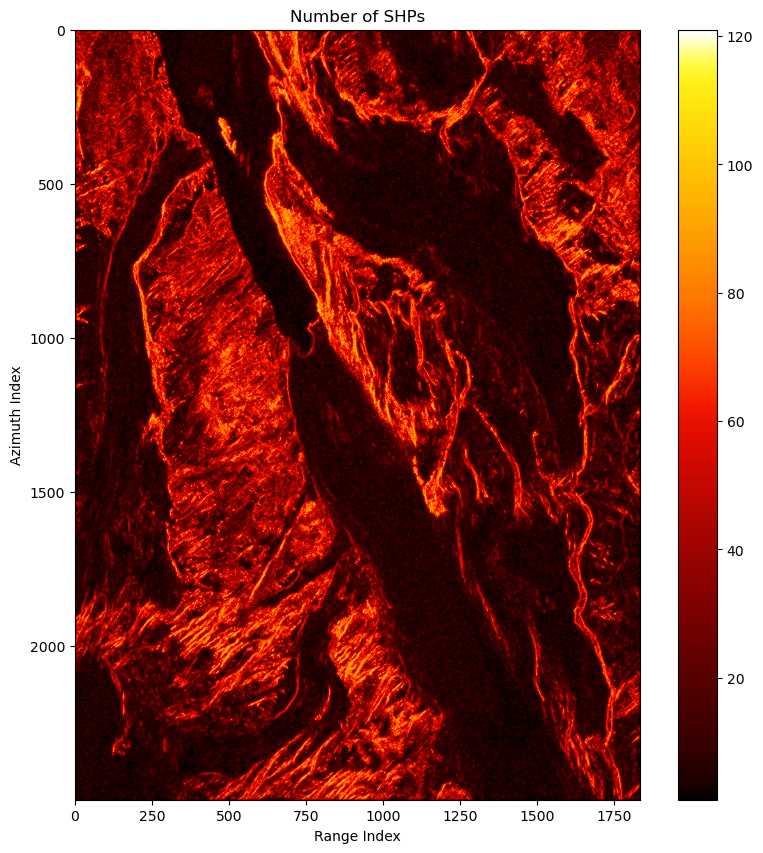

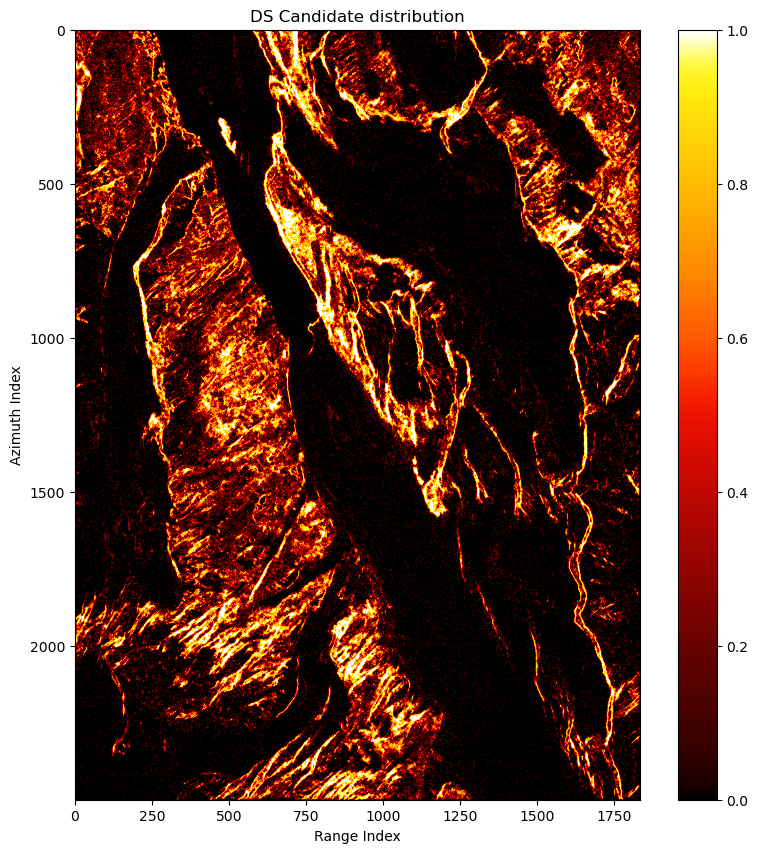

In [ ]:
de_select_ds_can(pvalue,ds_can_idx,ds_can_is_shp,
                 p_max=p_max,az_chunk_size=az_chunk_size,
                 shp_num_fig=shp_num_fig,is_ds_can_fig=is_ds_can_fig)

The output `ds_can_is_shp` indicate wheather a DS candidate in the window is a SHP to its center pixel.
`ds_can_idx` is a int array with shape of (2, num_of_DS_can). It indicate the position of DS candidate in radar coordinate.

## Coherence matrix estimation

Then we estimate the coherence matrix of ds candidate:

In [ ]:
from decorrelation.cli.co import de_emperical_co_pc

In [ ]:
ds_can_coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
az_chunk_size = 1000
ds_can_coh_ave_fig = './DS_Processing_with_CLI/ds_can_coh_ave.png'

In [ ]:
de_emperical_co_pc(rslc,ds_can_is_shp,ds_can_idx,ds_can_coh,
                   az_chunk_size=az_chunk_size,
                   ds_can_coh_ave_fig=ds_can_coh_ave_fig)

2023-10-13 21:41:36 - de_emperical_co_pc - INFO - fetching args:
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - rslc = './DS_Processing_with_CLI/rslc.zarr'
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - ds_can_is_shp = './DS_Processing_with_CLI/ds_can_is_shp.zarr'
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - ds_can_idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - ds_can_coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - az_chunk_size = 1000
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - n_pc_chunk = None
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - pc_chunk_size = None
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - ds_can_coh_ave_fig = './DS_Processing_with_CLI/ds_can_coh_ave.png'
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - log = None
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - fetching args done.
2023-10-13 21:41:36 - de_emperical_co_pc - INFO - ./DS_Proc

2023-10-13 21:41:39,186 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:41:39,186 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:41:39,186 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:41:39,186 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:41:39,189 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:41:39,189 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:41:39,189 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:41:39,189 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:41:39,189 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:41:39,189 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-

2023-10-13 21:41:42 - de_emperical_co_pc - INFO - dask local CUDA cluster started.
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - create raster bool array is_ds_can from ds_can_idx
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - create dask bool array is_ds_can
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - is_ds_can dask array shape: (2500, 1834)
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - is_ds_can dask array chunksize: (1000, 1834)
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - is_ds_can dask array dtype: bool
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - Using azimuth chunk size as the processing chunk size.
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - Calculate point chunk size
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - Point chunk size: (346329, 274921, 119147)
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - rslc dask array shape: (2500, 1834, 17)
2023-10-13 21:41:42 - de_emperical_co_pc - INFO - rslc dask array chunksize: (1000, 1834, 17)
2023-

## Phase linking

To get rid of the closure phase, phase linking is applied here:

In [ ]:
from decorrelation.cli.pl import de_emi
import zarr

In [ ]:
ds_can_ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
ds_can_emi_quality = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
ref = 0
vmin=1.0
vmax=1.3
emi_quality_fig = './DS_Processing_with_CLI/emi_quality.png'

In [ ]:
shape = zarr.open(pvalue,'r').shape[:2]

2023-10-13 21:42:17 - de_emi - INFO - fetching args:
2023-10-13 21:42:17 - de_emi - INFO - coh = './DS_Processing_with_CLI/ds_can_coh.zarr'
2023-10-13 21:42:17 - de_emi - INFO - ph = './DS_Processing_with_CLI/ds_can_ph.zarr'
2023-10-13 21:42:17 - de_emi - INFO - emi_quality = './DS_Processing_with_CLI/ds_can_emi_quality.zarr'
2023-10-13 21:42:17 - de_emi - INFO - ref = 0
2023-10-13 21:42:17 - de_emi - INFO - point_chunk_size = None
2023-10-13 21:42:17 - de_emi - INFO - log = None
2023-10-13 21:42:17 - de_emi - INFO - plot_emi_quality = True
2023-10-13 21:42:17 - de_emi - INFO - vmin = 1.0
2023-10-13 21:42:17 - de_emi - INFO - vmax = 1.3
2023-10-13 21:42:17 - de_emi - INFO - ds_idx = './DS_Processing_with_CLI/ds_can_idx.zarr'
2023-10-13 21:42:17 - de_emi - INFO - shape = (2500, 1834)
2023-10-13 21:42:17 - de_emi - INFO - emi_quality_fig = './DS_Processing_with_CLI/emi_quality.png'
2023-10-13 21:42:17 - de_emi - INFO - fetching args done.
2023-10-13 21:42:17 - de_emi - INFO - ./DS_Proces

2023-10-13 21:42:19,594 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Creating preload: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-10-13 21:42:19,594 - distributed.preloading - INFO - Import preload module: dask_cuda.initialize
2023-

2023-10-13 21:42:24 - de_emi - INFO - dask local CUDA cluster started.
2023-10-13 21:42:24 - de_emi - INFO - coh dask array shape: (740397, 17, 17)
2023-10-13 21:42:24 - de_emi - INFO - coh dask array chunksize: (1000, 17, 17)
2023-10-13 21:42:24 - de_emi - INFO - coh dask array dtype: complex64
2023-10-13 21:42:24 - de_emi - INFO - phase linking with EMI.
2023-10-13 21:42:25 - de_emi - INFO - got ph and emi_quality.
2023-10-13 21:42:25 - de_emi - INFO - ph dask array shape: (740397, 17)
2023-10-13 21:42:25 - de_emi - INFO - ph dask array chunksize: (1000, 17)
2023-10-13 21:42:25 - de_emi - INFO - ph dask array dtype: complex64
2023-10-13 21:42:25 - de_emi - INFO - emi_quality dask array shape: (740397,)
2023-10-13 21:42:25 - de_emi - INFO - emi_quality dask array chunksize: (1000,)
2023-10-13 21:42:25 - de_emi - INFO - emi_quality dask array dtype: float32
2023-10-13 21:42:25 - de_emi - INFO - saving ph and emi_quality.
2023-10-13 21:42:25 - de_emi - INFO - computing graph setted. doi

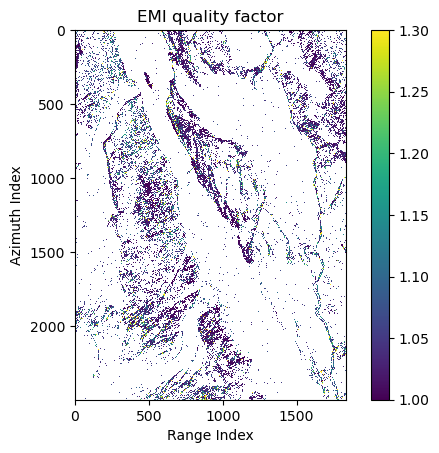

In [ ]:
de_emi(ds_can_coh,ds_can_ph,ds_can_emi_quality,
       ref=ref,point_chunk_size=None,
       plot_emi_quality=True,vmin=vmin,vmax=vmax,
       ds_idx=ds_can_idx,shape=shape,emi_quality_fig=emi_quality_fig)

Unfinished...